# Multiple Linear regresion model

#### About this Dataset
This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

It's a great dataset for evaluating Multiple regression models

#### Goal:-
To predict whether a particular startup would be safe to invest in or not.

In [2]:
# First lets import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma

# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, RFECV
# Terminal --> pip install mlxtend

#from mlxtend.feature_selection

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Lets import the dataset
startup = pd.read_csv('50_Startups.csv')

In [6]:
# Descriptive analysis on the data
startup.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


<Axes: >

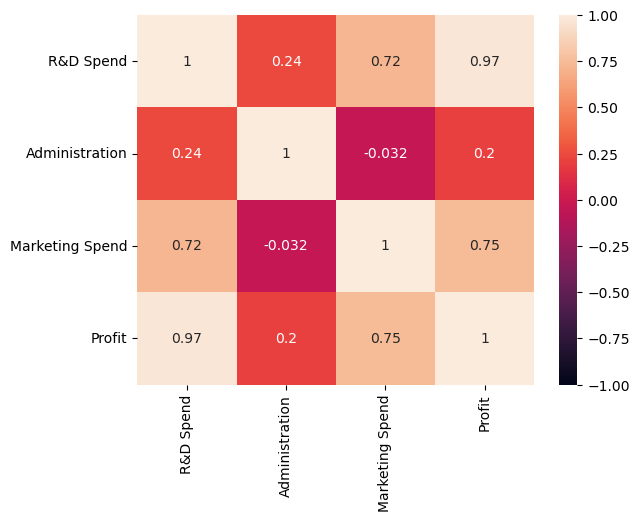

In [7]:
# lets see the corelation of all the columns
sns.heatmap(startup.corr(),annot=True, vmax=1,vmin=-1)

#### Univariate analysis

In [12]:
num_cols = startup.select_dtypes(include = np.number).columns
num_cols

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

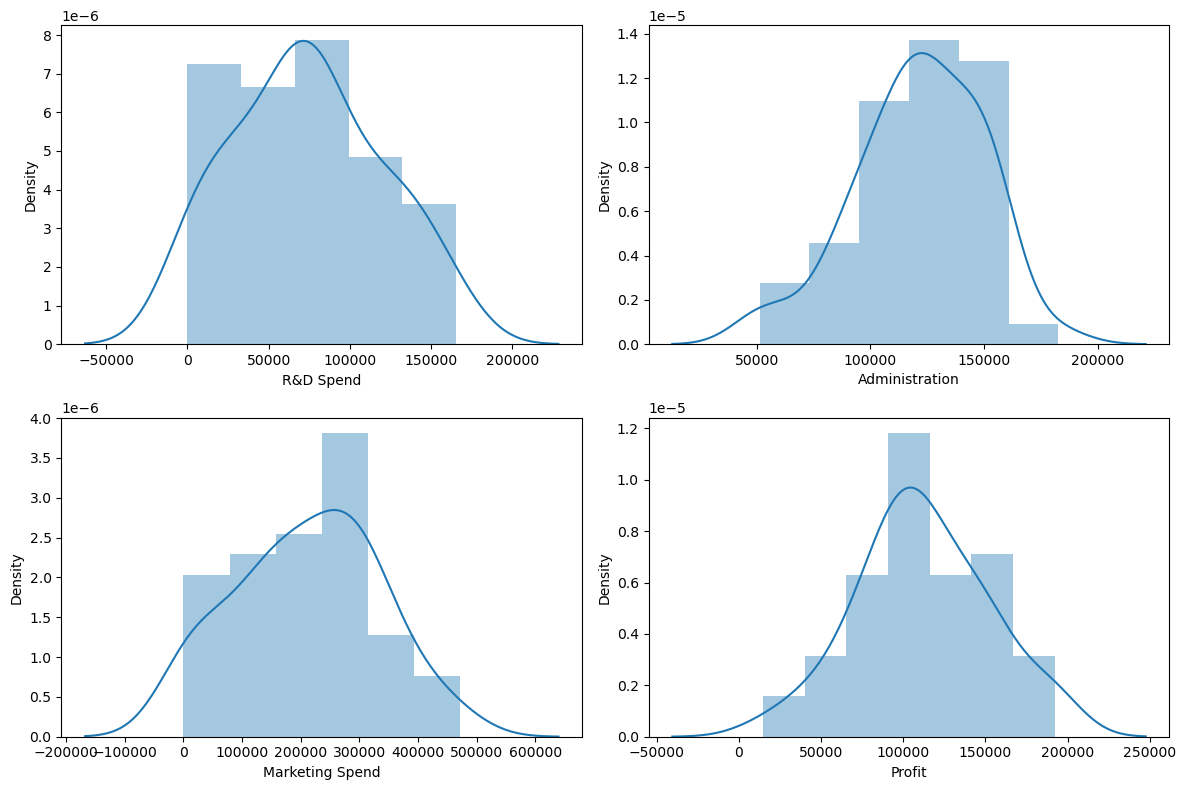

In [20]:
plt.figure(figsize = (12,8))
t = 1
for i in num_cols:
    plt.subplot(2,2,t)
    sns.distplot(startup[i])
    t += 1
plt.tight_layout()
plt.show()


#### Biavariate analysis

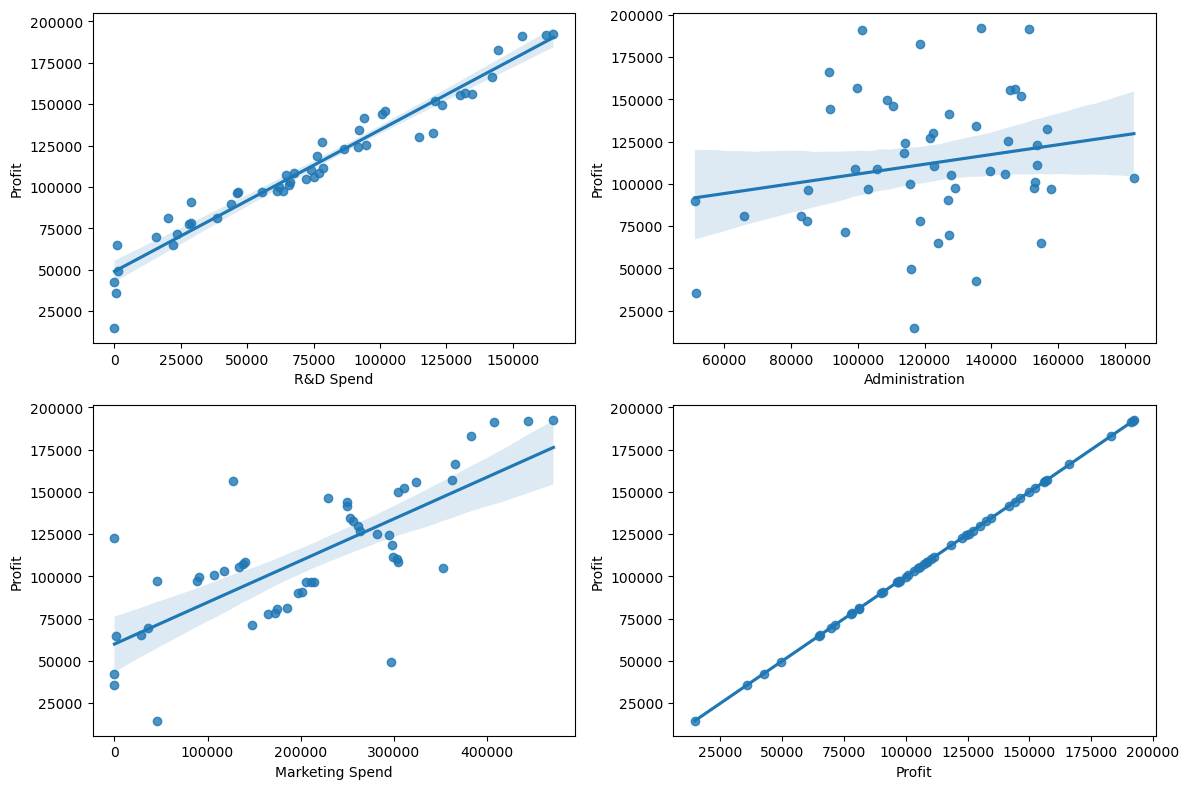

In [29]:
plt.figure(figsize = (12,8))

t = 1
for i in num_cols:
    plt.subplot(2,2,t)
    sns.regplot(data = startup, x = i, y = 'Profit')
    t += 1
plt.tight_layout()
plt.show()


Inferences
* We can see as the R&D Spend increases the profit increases
* Marketing spend also has a postive relationship with the profit


In [63]:
startup.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

<Axes: xlabel='State'>

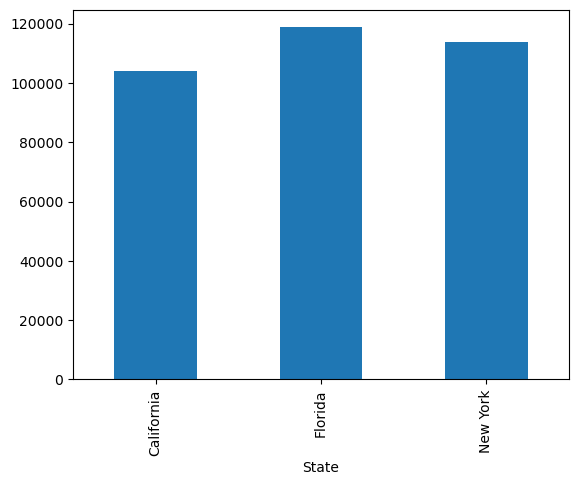

In [66]:
startup.groupby(by=['State'])['Profit'].mean().plot(kind = 'bar')

Inferences
* Here we can see state is a usefull column so we will keep it

In [72]:
startup = pd.get_dummies(startup, drop_first=True)

#### Lets check for anomalies

In [31]:
startup.duplicated().sum()

0

In [33]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Inferences
* No anomalies can be found

#### Lets check for some outliers

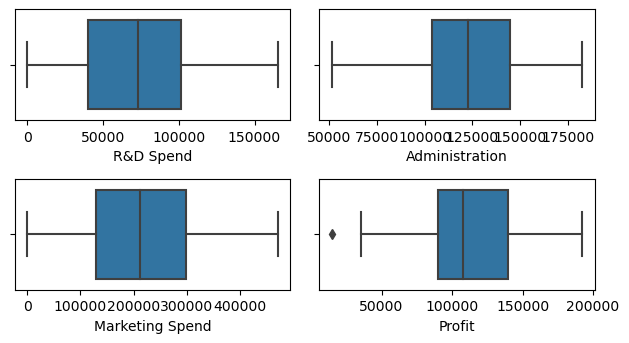

In [44]:
t = 1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data = startup, x = i)
    t += 1
plt.tight_layout()
plt.show()


* No significant outliers

#### Encoding
We have a categorical variable so now we will use encoding technique to make it numerical

In [47]:
# Splitting the data
from sklearn.model_selection import train_test_split
x = startup.drop(columns = ['Profit'])
y = startup['Profit']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [75]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(37, 5) (37,) (13, 5) (13,)


#### Lets make the model

In [81]:
# import statsmodels.formula.api as sma
x_train_c = sma.add_constant(x_train)
x_test_c = sma.add_constant(x_test)
model = sma.OLS(y_train,x_train_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     96.26
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           6.21e-18
Time:                        23:25:59   Log-Likelihood:                -390.30
No. Observations:                  37   AIC:                             792.6
Df Residuals:                      31   BIC:                             802.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.017e+04   9471.546      6.353      0.000    4.09e+04    7.95e+04
R&D Spend           0.8299      0.063     13.160      0.000       0.701       0.959
Administration     -0.1032      0.073     -1.413      0.168      -0.252       0.046
Marketing Spend     0.0156      0.023      0.692      0.494      -0.030       0.061
State_Florida    -927.4299   4254.514     -0.218      0.829   -9604.569    7749.709
State_New York   1772.1062   4054.035      0.437      0.665   -6496.153       1e+04
==============================================================================
Omnibus:                       18.569   Durbin-Watson:                   2.455
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.454
Skew:                          -1.353   Prob(JB):                     1.09e-06
Kurtosis:                       6.238   Cond. No.                     1.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
predictions = model.predict(x_test_c)
print(predictions)

36     73053.811400
47     46195.259838
28     97052.512772
9     156066.823400
13    126471.597360
0     192393.425929
44     63042.286361
46     53011.883967
39     86335.825125
23    109125.984833
24    117829.710451
48     57055.495127
17    129932.017650
dtype: float64


#### Evaluating the model using visualisation

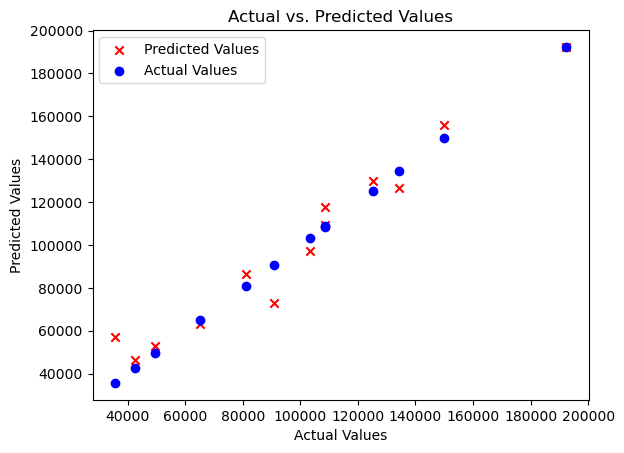

In [87]:
plt.scatter(y_test, predictions, color='red', marker='x', label='Predicted Values')
plt.scatter(y_test, y_test, color='blue', marker='o', label='Actual Values')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()